In [2]:
#prac 4: Assuming a set of documentsthat need to be classified, use the naïve Bayesian Classifier model to perform this task.'
#https://raw.githubusercontent.com/AbhishekMali21/VTU-CSE-LAB-SOLUTIONS/refs/heads/master/7th%20SEM/MACHINE%20LEARNING%20LABORATORY/6-Naive%20Bayesian%20Classifier(using%20API)/document.csv
# Step 1: Import standard libraries
import pandas as pd

# Step 2: Read the dataset
msg = pd.read_csv('document.csv', names=['message', 'label'])
print('The dimensions of the dataset', msg.shape)

# Step 3: Print the top 5 rows of the dataset
msg['labelnum'] = msg.label.map({'pos': 1, 'neg': 0})
X = msg.message
y = msg.labelnum
print(X)
print(y)
msg.head()


The dimensions of the dataset (18, 2)
0                      I love this sandwich
1                  This is an amazing place
2        I feel very good about these beers
3                      This is my best work
4                      What an awesome view
5             I do not like this restaurant
6                  I am tired of this stuff
7                    I can't deal with this
8                      He is my sworn enemy
9                       My boss is horrible
10                 This is an awesome place
11    I do not like the taste of this juice
12                          I love to dance
13        I am sick and tired of this place
14                     What a great holiday
15           That is a bad locality to stay
16           We will have good fun tomorrow
17         I went to my enemy's house today
Name: message, dtype: object
0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17   

message label  labelnum
0                I love this sandwich   pos         1
1            This is an amazing place   pos         1
2  I feel very good about these beers   pos         1
3                This is my best work   pos         1
4                What an awesome view   pos         1

In [3]:
# Step 1: Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=4, random_state=4)
print('\n The total number of Training Data:', ytrain.shape)
print('\n The total number of Test Data:', ytest.shape)

# Step 2: Output of count vectorizer is a sparse matrix
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain)
xtest_dtm = count_vect.transform(xtest)

print('\n The words or Tokens in the text documents \n')
print(count_vect.get_feature_names_out())
df = pd.DataFrame(xtrain_dtm.toarray(), columns=count_vect.get_feature_names_out())



 The total number of Training Data: (14,)

 The total number of Test Data: (4,)

 The words or Tokens in the text documents 

['about' 'am' 'amazing' 'an' 'and' 'awesome' 'bad' 'beers' 'boss' 'can'
 'dance' 'deal' 'do' 'enemy' 'feel' 'good' 'great' 'he' 'holiday'
 'horrible' 'house' 'is' 'like' 'locality' 'love' 'my' 'not' 'of' 'place'
 'restaurant' 'sandwich' 'sick' 'stay' 'sworn' 'that' 'these' 'this'
 'tired' 'to' 'today' 'very' 'view' 'went' 'what' 'with']



 Accuracy of the classifier is 0.75

 Confusion matrix
[[2 0]
 [1 1]]

 The value of Precision 1.0

 The value of Recall 0.5

 The value of f1 score: 0.6666666666666666


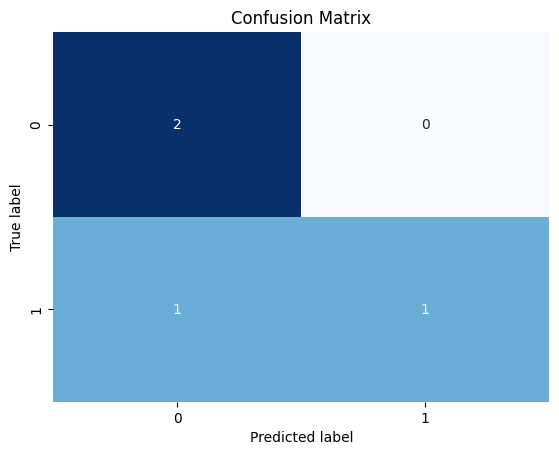

In [4]:
# Step 1: Training Naive Bayes (NB) classifier on training data
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(xtrain_dtm, ytrain)
predicted = clf.predict(xtest_dtm)

# Step 2: Printing accuracy, Confusion matrix, Precision, and Recall
from sklearn import metrics
print('\n Accuracy of the classifier is', metrics.accuracy_score(ytest, predicted))
print('\n Confusion matrix')
print(metrics.confusion_matrix(ytest, predicted))
print('\n The value of Precision', metrics.precision_score(ytest, predicted))
print('\n The value of Recall', metrics.recall_score(ytest, predicted))
print('\n The value of f1 score:', metrics.f1_score(ytest, predicted))

# Step 3: Plot the confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

confusion = metrics.confusion_matrix(ytest, predicted)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()
